In [1]:
# GK

def find_first_blank_position(sudoku):
    for row in range(9):
        for col in range(9):
            if sudoku[row][col] == 0:
                return row, col
    return None

def find_numbers_to_fill(sudoku, i, j):
    row_vals = set(sudoku[i])
    col_vals = set(sudoku[x][j] for x in range(9))
    box_row, box_col = 3 * (i // 3), 3 * (j // 3)
    box_vals = set(
        sudoku[r][c]
        for r in range(box_row, box_row + 3)
        for c in range(box_col, box_col + 3)
    )
    return set(range(1, 10)) - row_vals - col_vals - box_vals

def solve(sudoku):
    pos = find_first_blank_position(sudoku)
    if pos is None:
        print(sudoku)
        return True
    i, j = pos
    candidates = find_numbers_to_fill(sudoku, i, j)
    for candidate in candidates:
        sudoku[i][j] = candidate
        if solve(sudoku):
            return True
        sudoku[i][j] = 0
    return False

In [8]:
class Job:
    def __init__(self,job_description):
        self.salary=job_description['salary']
        self.distance=job_description['distance']
        self.coffee=job_description['coffe']
        self.nightshift=job_description['nightshift']
        
    def check(self):
        if self.salary<=1000:
            if self.distance<=50:
                if self.coffee=='Yes':
                    if self.nightshift=='no':
                        return True
                    else:
                        return False
                else:
                    return False
            else:
                return False
        else:
            if self.distance<=60:
                if self.coffee=='no'or 'Yes':
                    if self.nightshift=='no':
                        return True
                    else:
                        return False
                else: 
                    return False
            else:
                return False


In [9]:
job_description = {
    "salary": 15000,
    "distance": 60,
    "coffe": 'Yes',
    "nightshift":'no'
}
job = Job(job_description)
job.check()

True

In [10]:
job_description = {
    "salary": 1000,
    "distance": 60,
    "coffe": 'Yes',
    "nightshift":'no'
}
job = Job(job_description)
job.check()

False

In [24]:
# Nigam
def permute(s):
    print(f"Starting {s} ")
    if len(s) == 1:
        result = [s]
        print(f"{s} -> {result}")
        return result
    first_letter = s[0]
    remaining = s[1:]
    previous = permute(remaining)
    result = []
    for p in previous:
        print(f"Going to insert {first_letter} at all the places of of {p}")
        for i in range(len(p) + 1):
            new_word = p[:i] + first_letter + p[i:]
            result.append(new_word)
    print(f"{s} -> {result}")
    return result

In [22]:
permute('a')

Starting a 
a -> ['a']


['a']

In [23]:
permute('ab')

Starting ab 
Starting b 
b -> ['b']
Going to insert a at all the places of of b
ab -> ['ab', 'ba']


['ab', 'ba']

In [29]:
set("aefbcdabababa") - set("ab")

{'c', 'd', 'e', 'f'}

In [33]:
# Chatgpt
def permute(s):
    # Base case: if string has only one character
    if len(s) == 1:
        return [s]
    print(f"Finding permutations of {s}")

    # List to store all permutations
    permutations = []
    
    # Iterate through every character in the string
    for i in range(len(s)):
        # Pick the current character
        char = s[i]
        
        # Remaining characters after removing current one
        remaining = s[:i] + s[i+1:]
        
        # Generate all permutations of the remaining string
        for p in permute(remaining):
            permutations.append(char + p)
    
    return permutations


# Example usage
s = "abc"
result = permute(s)
print("Permutations of", s, "are:")
print(result)


Finding permutations of abc
Finding permutations of bc
Finding permutations of ac
Finding permutations of ab
Permutations of abc are:
['abc', 'acb', 'bac', 'bca', 'cab', 'cba']


In [34]:
def p_itr(s):
    counts = []
    for i in range(len(s)):
        counts.append(-1)
    pos = 0
    word = []
    while True:
        if pos >= len(s):
            print(word)
        # find next letter to be filled in current pos 
        # if next letter is exhausted we go pos -= 1, set current position to -1

# Build a Decision Tree to Choose a Job Offer

## 1) Concept (Plain English)

You’ll implement a very simple **binary decision tree** for yes/no decisions:

* Each **internal node** has:

  * a **criterion** (one of: `salary`, `distance`, `coffee`, `is_nightshift`)
  * a **value** (the threshold)
  * a rule:

    * **go left** if `feature_value ≤ value`
    * **go right** if `feature_value > value`
* Each **leaf node** is a final **decision**: `YES` (accept) or `NO` (reject).

You’ll then:

1. Define a `DecisionTreeNode` class.
2. Build the exact tree shown in the prompt (with minor fixes).
3. Call `.check(job_description)` to get `True`/`False`.

---

## 2) Problem Statement

### Your Task

Write a class `DecisionTreeNode` that can act as either:

* a **boundary node** with `boundary`, `boundary_value`, `left`, `right`, or
* a **leaf** with a final `decision` (`True` for YES, `False` for NO).

Implement:

* `check(features: dict) -> bool`
  Traverses from the current node down to a leaf using the rule
  “go left if `features[boundary] ≤ boundary_value`, else right”,
  and returns the leaf’s boolean decision.

Also create two helpers:

* `YES()` → returns a leaf node that decides `True`
* `NO()`  → returns a leaf node that decides `False`

Then **build this tree**:

```
If salary ≤ 1000 → NO
Else (salary > 1000):
    If distance ≤ 40 → YES
    Else → NO
```

> You can extend it later with coffee or nightshift rules in the bonuses.


In [80]:
class DecisionNode:
    def __init__(self, boundary, boundary_value, left=None, right=None):
        self.boundary = boundary
        self.boundary_value = boundary_value
        self.left = left
        self.right = right
        
    def check(self, features):
        job_offer_value = features[self.boundary]
        if job_offer_value < self.boundary_value:
            return self.left.check(features)
        else:
            return self.right.check(features)
    def pprint(self, indent=""):
        print(f"{indent}{self.boundary} < {self.boundary_value}")
        self.left.pprint(indent=indent + "\t")
        print(f"{indent}{self.boundary} >= {self.boundary_value}")
        self.right.pprint(indent=indent + "\t")
    def to_dict(self):
        return {
            "boundary": self.boundary,
            "boundary_value": self.boundary_value,
            "left": self.left.to_dict(),
            "right": self.right.to_dict()
        }

In [81]:
class Yes(DecisionNode):
    def __init__(self):
        pass
    def check(self, features):
        return True
    def pprint(self, indent=""):
        print(f"{indent}YES")
    def to_dict(self):
        return True

In [82]:
class No(DecisionNode):
    def __init__(self):
        pass
    def check(self, features):
        return False
    def pprint(self, indent=""):
        print(f"{indent}NO")
    def to_dict(self):
        return False

In [83]:
_left_1 = DecisionNode(
    "distance",
    50,
    DecisionNode(
        "coffee",
        1,
        No(),
        DecisionNode(
            "nightshift",
            1,
            Yes(),
            No(),
        )
    ),
    No()
    )

_right_1 = DecisionNode(
    'distance',
    60,
    DecisionNode(
        'nightshift',
        1,
        Yes(),
        No()
    ),
    No()
)
tree = DecisionNode(
    "salary",
    1000,
    _left_1,
    _right_1
)

In [84]:
tree.pprint()

salary < 1000
	distance < 50
		coffee < 1
			NO
		coffee >= 1
			nightshift < 1
				YES
			nightshift >= 1
				NO
	distance >= 50
		NO
salary >= 1000
	distance < 60
		nightshift < 1
			YES
		nightshift >= 1
			NO
	distance >= 60
		NO


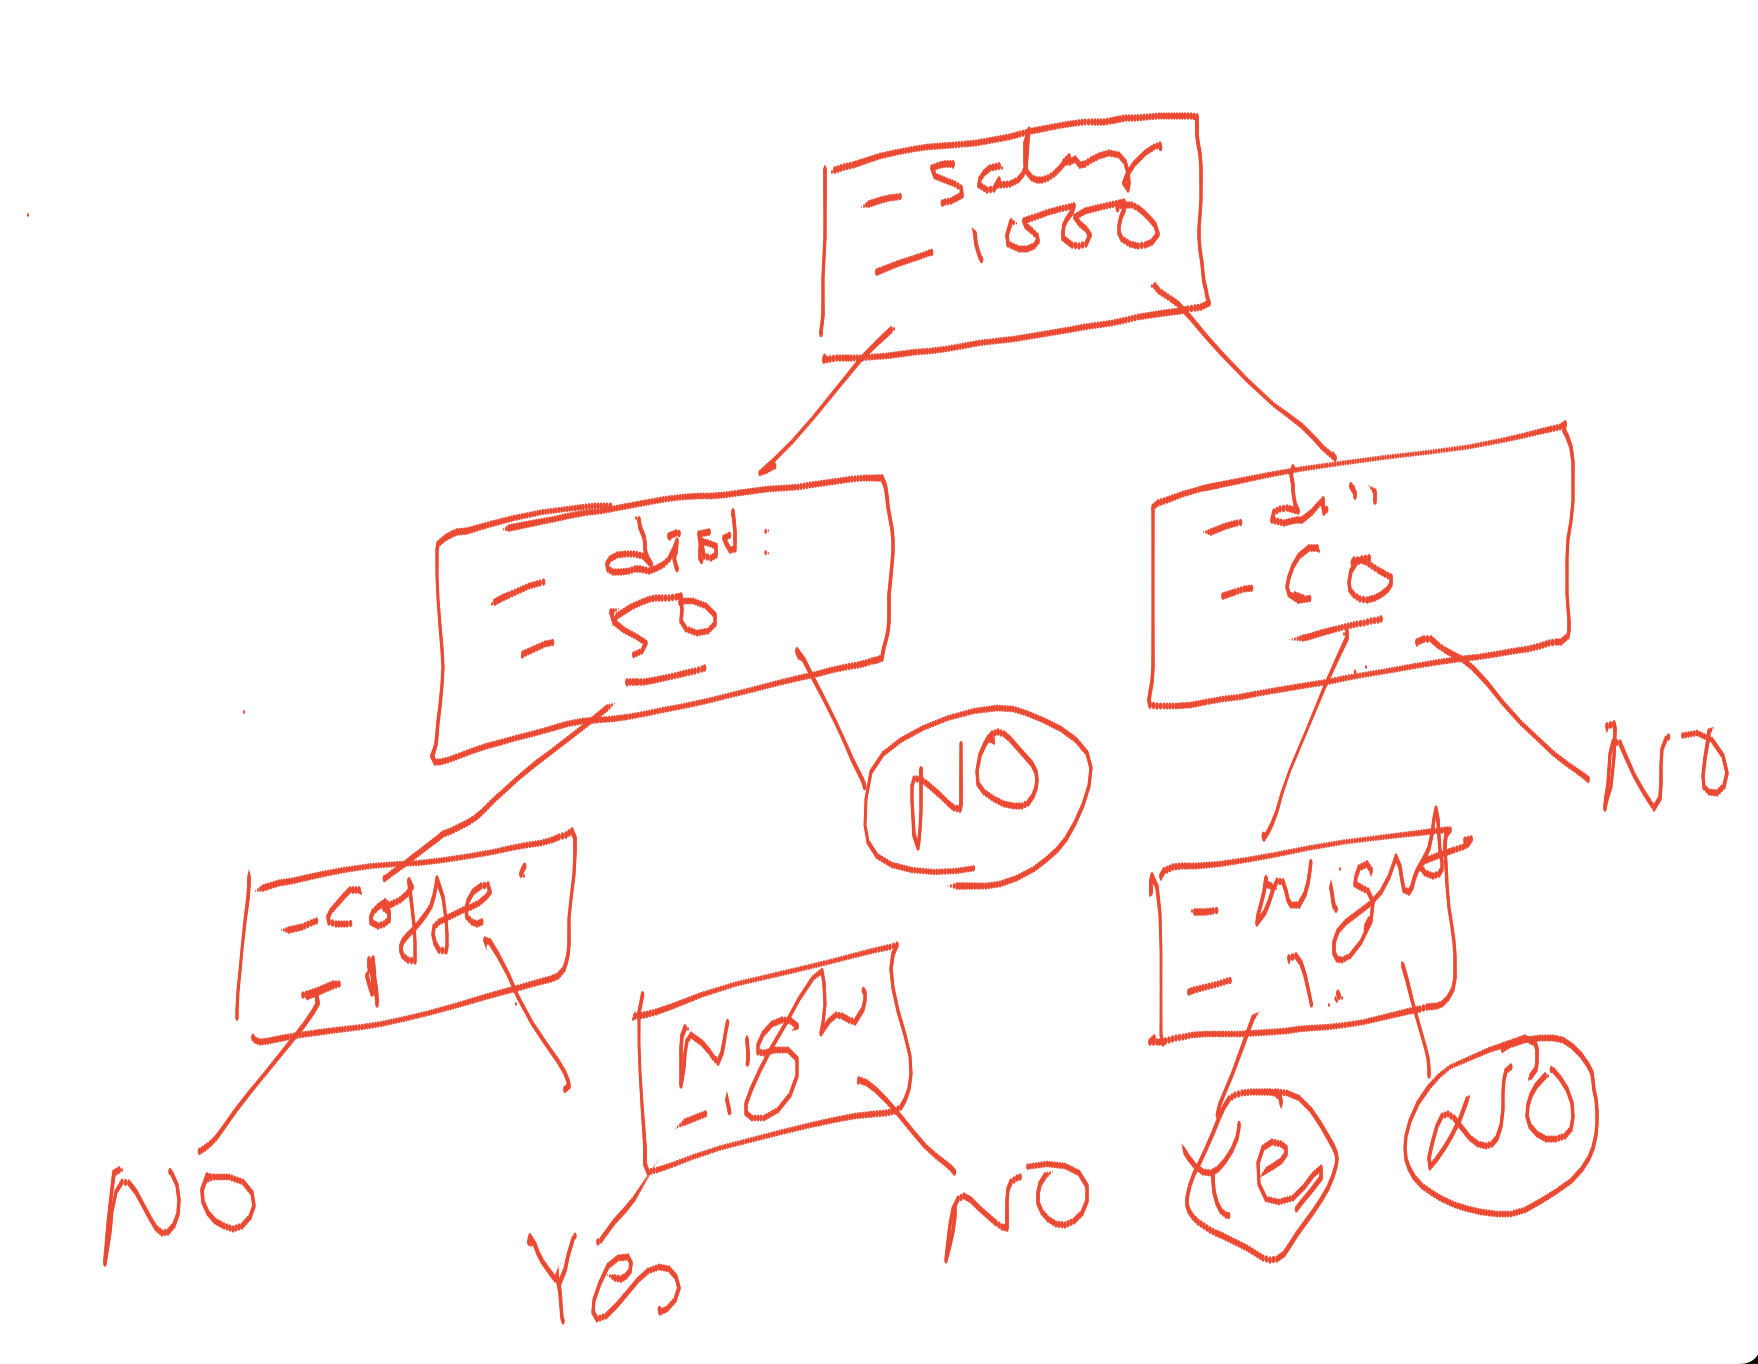

In [69]:
job_description = {
    "salary": 1000,
    "distance": 45,
    "coffee": 1,
    "nightshift": 0
}

tree.check(job_description)

True

In [70]:
job_description = {
    "salary": 1000,
    "distance": 45,
    "coffee": 1,
    "nightshift": 1
}

tree.check(job_description)

False

In [71]:
job_description = {
    "salary": 1000,
    "distance": 45,
    "coffee": 0,
    "nightshift": 0
}

tree.check(job_description)

True

In [72]:
job_description = {
    "salary": 1000,
    "distance": 60,
    "coffee": 0,
    "nightshift": 0
}

tree.check(job_description)

False

In [73]:
job_description = {
    "salary": 900,
    "distance": 45,
    "coffee": 1,
    "nightshift": 1
}

tree.check(job_description)

False

In [ ]:
job_description = {
    "salary": 900,
    "distance": 45,
    "coffee": 1,
    "nightshift": 1
}

tree.check(job_description)

In [86]:
d = tree.to_dict()
d

{'boundary': 'salary',
 'boundary_value': 1000,
 'left': {'boundary': 'distance',
  'boundary_value': 50,
  'left': {'boundary': 'coffee',
   'boundary_value': 1,
   'left': False,
   'right': {'boundary': 'nightshift',
    'boundary_value': 1,
    'left': True,
    'right': False}},
  'right': False},
 'right': {'boundary': 'distance',
  'boundary_value': 60,
  'left': {'boundary': 'nightshift',
   'boundary_value': 1,
   'left': True,
   'right': False},
  'right': False}}

In [87]:
import json

In [89]:
json.dump(d, open("mytree.json", "w+"))

In [91]:
txt = open("mytree.json").read()

In [93]:
d = json.loads(txt)

In [94]:
d

{'boundary': 'salary',
 'boundary_value': 1000,
 'left': {'boundary': 'distance',
  'boundary_value': 50,
  'left': {'boundary': 'coffee',
   'boundary_value': 1,
   'left': False,
   'right': {'boundary': 'nightshift',
    'boundary_value': 1,
    'left': True,
    'right': False}},
  'right': False},
 'right': {'boundary': 'distance',
  'boundary_value': 60,
  'left': {'boundary': 'nightshift',
   'boundary_value': 1,
   'left': True,
   'right': False},
  'right': False}}

In [95]:
type({}) == dict

True

In [98]:
def create_tree_from_dict(d):
    if type(d) == type({}):
        return DecisionNode(
            d['boundary'], 
            d['boundary_value'], 
            create_tree_from_dict(d['left']), 
            create_tree_from_dict(d['right'])
        )
    if d == True:
        return Yes()
    else:
        return No()

In [100]:
lt = create_tree_from_dict(d)

In [102]:
job_description = {
    "salary": 900,
    "distance": 45,
    "coffee": 1,
    "nightshift": 1
}
lt.check(job_description), tree.check(job_description)

(False, False)

### Give hundress of historical data containing job_descriptions and corresponding answer, come up automatically with Tree




ages =    [2, 3, 4, 5, 6, 10, 12, 13, 16, 17, 19]
allowed = [0, 0, 0, 0, 0, 0,  1,  1,  1,  1,  1]

Go over the ages and figure out which age boundary is giving most purity in 'allowed'
- select the age, left_counts of (0s, 1s), right_counts of 0s and 1s,

```
 DecisionNode:
     age
     12,
     No(),
     Yes()
```